In [66]:
import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import plotly.express as px
import datetime


In [67]:
#open file

k=pd.read_csv('kasall.csv')
print(k.columns)
kas=DataFrame(k.head(80))
print(kas.head(80))

Index(['Date', 'County', 'Pib', 'Nrfirme', 'AvgSalariatiPers',
       'BiblioteciTotal', 'PersonalAngajatInBiblioteci',
       'CitioriActiviInBiblioteci', 'Cinematografe', 'Locuriincinematografe',
       'SpectatorilaReprezentatii ', 'MuzeeSiColectii ', 'SportiviLegitimati',
       'ValoareSalariuMediu', 'ValoareSalariu   '],
      dtype='object')
          Date  County    Pib  Nrfirme  AvgSalariatiPers  BiblioteciTotal  \
0   12/30/2007  Brasov  13946    19143            163788              227   
1   12/30/2008  Brasov  16857    20287            169429              216   
2   12/30/2009  Brasov  17560    19626            150855              231   
3   12/30/2010  Brasov  17586    17617            145465              218   
4   12/30/2011  Brasov  17674    16209            145274              202   
..         ...     ...    ...      ...               ...              ...   
68  12/30/2014   Ilfov  16957    17490            108343              112   
69  12/30/2015   Ilfov  17181    

In [80]:
kas['Nrfirme']=kas.Nrfirme.astype(float)
kas['Pib']=kas.Pib.astype(float)
kas['AvgSalariatiPers']=kas.AvgSalariatiPers.astype(float)
kas['ValoareSalariuMediu']=kas.ValoareSalariuMediu.astype(float)

Parse timeseries 

In [81]:
kas['Date']=pd.to_datetime(kas['Date'], infer_datetime_format=True)
indexeddf=kas.set_index(['Date'])


Parsing to time format and extracting dates with 'Date'

In [82]:
x=kas['Date']=pd.to_datetime(kas['Date'], format='%y-%m-%d')

Day=kas['Date'].dt.day_name()
print(Day)

Month=kas['Date'].dt.month_name()
print(Month)

Year=kas['Date'].dt.year
print(Year)

0        Sunday
1       Tuesday
2     Wednesday
3      Thursday
4        Friday
        ...    
68      Tuesday
69    Wednesday
70       Friday
71     Saturday
72       Sunday
Name: Date, Length: 73, dtype: object
0     December
1     December
2     December
3     December
4     December
        ...   
68    December
69    December
70    December
71    December
72    December
Name: Date, Length: 73, dtype: object
0     2007
1     2008
2     2009
3     2010
4     2011
      ... 
68    2014
69    2015
70    2016
71    2017
72    2018
Name: Date, Length: 73, dtype: int64


Subset time series

In [83]:
kas['Year']=kas['Date'].dt.year
kas['Month']=kas['Date'].dt.month_name()
kas['Day']=kas['Date'].dt.day_name()
print(kas.head(80))

         Date  County      Pib  Nrfirme  AvgSalariatiPers  BiblioteciTotal  \
0  2007-12-30  Brasov  13946.0  19143.0          163788.0              227   
1  2008-12-30  Brasov  16857.0  20287.0          169429.0              216   
2  2009-12-30  Brasov  17560.0  19626.0          150855.0              231   
3  2010-12-30  Brasov  17586.0  17617.0          145465.0              218   
4  2011-12-30  Brasov  17674.0  16209.0          145274.0              202   
..        ...     ...      ...      ...               ...              ...   
68 2014-12-30   Ilfov  16957.0  17490.0          108343.0              112   
69 2015-12-30   Ilfov  17181.0  19363.0          116023.0              105   
70 2016-12-30   Ilfov  19132.0  21001.0          128107.0              100   
71 2017-12-30   Ilfov  20501.0  23356.0          137941.0              101   
72 2018-12-30   Ilfov  16210.0      0.0          167718.0               99   

    PersonalAngajatInBiblioteci  CitioriActiviInBiblioteci  Cin

Subplot 

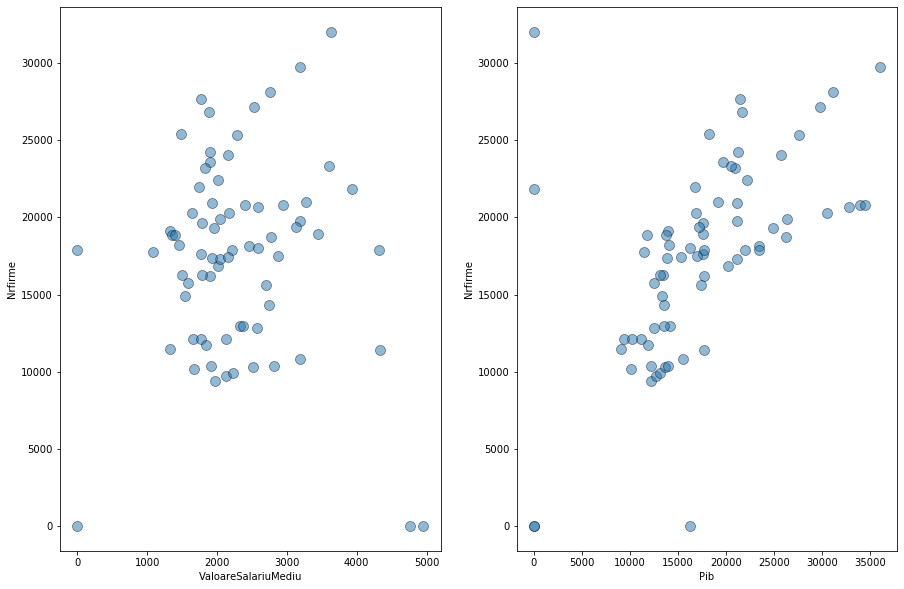

In [84]:
f,axes = plt.subplots(1,2, figsize=(15, 10))
A=sns.scatterplot(kas.ValoareSalariuMediu , kas.Nrfirme , s=100, edgecolor='black', alpha=0.5,\
     palette='husl',ax=axes[0])

B=sns.scatterplot(kas.Pib, kas.Nrfirme, s=100, edgecolor='black', alpha=0.5,\
     palette='husl',ax=axes[1])

plt.show()

In [85]:
"""f,axes = plt.subplots(2,2, figsize=(15,30))
K0=sns.scatterplot(data.KwH_After_App, data.Active_Hours, s=100, edgecolor='black', alpha=0.5,\
     palette='viridis',ax=axes[0,0])

x1=sns.stripplot(x='Day', y='KwH_After_App',jitter=0.25, marker='*',alpha=0.6, size=10, linewidth=1, palette="viridis", data=data, \
    ax=axes[0,1])

x2=sns.boxplot(data.Weather, data.KwH_After_App, palette='viridis',hue_order=[True,False],ax=axes[1,0])

x3=sns.scatterplot(data.Temperature_Celsius, data.consumtion_hours_After_app, s=100, edgecolor='black', alpha=0.5,\
     palette='summer', ax=axes[1,1])

plt.show()"""

'f,axes = plt.subplots(2,2, figsize=(15,30))\nK0=sns.scatterplot(data.KwH_After_App, data.Active_Hours, s=100, edgecolor=\'black\', alpha=0.5,     palette=\'viridis\',ax=axes[0,0])\n\nx1=sns.stripplot(x=\'Day\', y=\'KwH_After_App\',jitter=0.25, marker=\'*\',alpha=0.6, size=10, linewidth=1, palette="viridis", data=data,     ax=axes[0,1])\n\nx2=sns.boxplot(data.Weather, data.KwH_After_App, palette=\'viridis\',hue_order=[True,False],ax=axes[1,0])\n\nx3=sns.scatterplot(data.Temperature_Celsius, data.consumtion_hours_After_app, s=100, edgecolor=\'black\', alpha=0.5,     palette=\'summer\', ax=axes[1,1])\n\nplt.show()'

In [79]:
#